In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import california_housing

In [81]:
cali = california_housing.fetch_california_housing()

In [82]:
data = pd.DataFrame(cali.data,columns=cali.feature_names)
data['target'] = cali.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Split up data

In [83]:
train_df = data.iloc[:int(data.shape[0]*.60)]
val_df = data.iloc[int(data.shape[0]*.60):int(data.shape[0]*.90)]
test_df =data.iloc[int(data.shape[0]*.90):]

In [84]:
example_set = train_df.iloc[:10]
example_set

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [85]:
def check_purity(data):
    
    '''
    looks if there is only one class
    '''
    
    label = data[:,-1]
    #returns array of our unique labels
    unique_classes = np.unique(label)
    
    if len(unique_classes)==1:
        return True
    else:
        return False

In [86]:
def determine_type_of_feature(data):
    feature_types = []
    n_unique_values_threshold = 15
    for column in data.columns:
        unique_vals = data[column].unique()
        example_value = unique_vals[0]
        
        if type(example_value) == str or (len(unique_vals)<= n_unique_values_threshold):
            feature_types.append("categorical")
        else:
            feature_types.append("continuous")
    return feature_types

## Create Leaf

In [87]:
def calculate_mse(data):
    actual_values = data[:, -1]
    if len(actual_values) == 0:
        mse=0
    else:
        prediction = np.mean(actual_values)
        mse = np.mean((actual_values - prediction) **2)
        
    return mse


def classify_data(data):
    
    #outputs the majority class of the dataset
    
    label = data[:,-1]
    unique_classes, counts_of_unique_classes = np.unique(label,return_counts=True)

    index = counts_of_unique_classes.argmax()

    classification = unique_classes[index]

    
    
    
    
    return classification


In [88]:
def get_potential_splits(data):
    potential_splits = {}
    _, n_columns = data.shape

    for column_index in range(n_columns-1):
        
        values = data[:, column_index]
        univalues = np.unique(values)
        
        potential_splits[column_index] = univalues
        
    
    return potential_splits

In [89]:
def split_data(data, split_column, split_value):
    
    
    
    split_column_values = data[:, split_column]
    
    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == 'continuous':
    
        data_below = data[split_column_values <=split_value]
        data_above = data[split_column_values >split_value]

    else:
        data_below = data[split_column_values ==split_value]
        data_above = data[split_column_values !=split_value]
        
    
    return data_below, data_above

In [90]:
def create_leaf(data,ml_task):
    
    #outputs the majority class of the dataset
    
    label = data[:,-1]
    
    if ml_task == 'regression':
        
        leaf = np.mean(label)
        
    #classification  
    elif ml_task == 'classification':
        
    
        unique_classes, counts_of_unique_classes = np.unique(label,return_counts=True)

        index = counts_of_unique_classes.argmax()

        leaf = unique_classes[index]


    
    
    
    return leaf

## Determine best split

In [91]:
def calculate_mse(data):
    actual_values = data[:, -1]
    if len(actual_values) == 0:
        mse=0
    else:
        prediction = np.mean(actual_values)
        mse = np.mean((actual_values - prediction) **2)
        
    return mse

In [92]:
def calculate_entropy(data):
    label_column = data[:,-1]
    ##determine probabilities of the classes

    #count up the number of samples in each label
    _,counts = np.unique(label_column,return_counts=True)
    
    #convert the count to the probability of a value falling into a certain class label
    probabilities = counts/counts.sum()

    
    entropy = sum(probabilities * -np.log2(probabilities))

    return entropy

In [93]:
def calculate_overall_error_metric(data_below,data_above, metric_function):
    
    
    n_data_points = len(data_below) + len(data_above)


    #samples below the line
    p_data_below = len(data_below)/n_data_points

    #samples above the line
    p_data_above = len(data_above)/n_data_points
    
    
    

    overall_metric = (p_data_below * metric_function(data_below)

                      +p_data_above * metric_function(data_above))

    
    
    
    return overall_metric
    

In [94]:
def determine_best_split(data, potential_splits, ml_task):
    
    first_iteration = True

    for column_index in potential_splits:
        
        #print(COLUMN_HEADERS[column_index], "-", len(np.unique(data[:, column_index])))
        
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data,split_column=column_index,split_value=value)
            
            if ml_task == 'regression':

                current_overall_metric = calculate_overall_error_metric(data_below,data_above, metric_function=calculate_mse)
                
                
            #classification    
            else:
                current_overall_metric = calculate_overall_error_metric(data_below,data_above, metric_function=calculate_entropy)


            if first_iteration or current_overall_metric <= best_overall_metric:
                
                first_iteration = False
                
                
                best_overall_metric=current_overall_metric
                best_split_column = column_index
                best_split_value = value
                
                
    return best_split_column,best_split_value

In [97]:
def DecisionTreeAlgo(df,ml_task, counter=0, min_samples=2, max_depth=5):
    
    """
    minimum sample size: the minimum number of sampels a node must contain in
    order to consider splitting.
    """
    
    
    # data preparations
    
    if counter == 0:
        
        global COLUMN_HEADERS, FEATURE_TYPES
        
        
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        
        data = df.values
    else:
        
        data = df
        
        
    # base case for recusive function
    if (check_purity(data)) or (len(data)< min_samples) or (counter==max_depth):
        #return our prediction
        leaf = create_leaf(data,ml_task)
        return leaf
    
    
    #recursive section
    
    else:
        
        counter += 1
        
        
        # run helper functions
        
        potential_splits = get_potential_splits(data)
  
            
        #find lowest overall entropy
        
        split_column, split_value = determine_best_split(data, potential_splits,ml_task)
        
        
        data_below, data_above = split_data(data, split_column, split_value)
        
        
        #check for empty data
        if len(data_below) == 0 or len(data_above)==0:
            leaf = create_leaf(data,ml_task)
            return leaf
        
        
        #instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == 'continuous':
            question  = "{} <= {}".format(feature_name,split_value)
            
        else:
            
            question  = "{} == {}".format(feature_name,split_value)

        
        sub_tree = {question: []}
        
        
        #find answers
        
        yes_answer = DecisionTreeAlgo(data_below, ml_task, counter, min_samples,max_depth)
        
        
        no_answer = DecisionTreeAlgo(data_above, ml_task, counter, min_samples,max_depth)
        
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            
        
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        
        return sub_tree
        
    

In [100]:
tree = DecisionTreeAlgo(train_df,ml_task='regression',max_depth=5)

In [101]:
tree

{'MedInc <= 5.084': [{'MedInc <= 3.0924': [{'Latitude <= 34.42': [{'Longitude <= -118.31': [{'AveOccup <= 2.4508816120906802': [2.943946764705882,
          1.867811881443299]},
        {'Longitude <= -117.61': [1.5864523986856516, 0.9794810443037977]}]},
      {'Longitude <= -121.64': [{'Latitude <= 38.58': [1.5111005103668262,
          0.8950889263803681]},
        {'Latitude <= 37.31': [0.733247829839704, 1.0292046291560102]}]}]},
    {'AveOccup <= 2.4457831325301207': [{'Latitude <= 34.19': [{'Longitude <= -118.07': [3.3792795,
          2.3617990109890115]},
        {'Longitude <= -121.62': [2.4165330085959886, 1.5818548387096771]}]},
      {'Latitude <= 34.51': [{'AveOccup <= 3.1921182266009853': [2.212130393103448,
          1.699974913127413]},
        {'Longitude <= -120.91': [1.7867063037249282,
          1.1301084337349399]}]}]}]},
  {'MedInc <= 6.992': [{'AveOccup <= 2.580267558528428': [{'HouseAge <= 17.0': [{'MedInc <= 5.6197': [2.5408553225806445,
          3.3161739655

## PREDICTION

In [102]:
def predict(example, tree):
    question = list(tree.keys())[0]

    feature_name, comparison, value = question.split()

    # ask question
    
    if comparison == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0] 
        else:
            answer = tree[question][1] 
            
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0] 
        else:
            answer = tree[question][1]
        
        

    #base case    
    if not isinstance(answer, dict):
        return(answer)
    else:

        residual_tree = answer
        return predict(example,residual_tree) 

## HYPYERPARAM TUNER

In [108]:
def calculate_adjr_squared(data,tree):
    
    '''
    adjusted r square penalizes for adding independent variables that do not fit the model
    
    '''
    
    
    labels = data.iloc[:,-1]
    mean = labels.mean()
    
    predictions = data.apply(predict, args=(tree,), axis=1)
    
    ss_res = sum((labels - predictions) **2)
    ss_tot = sum((labels - mean) ** 2)
    r_squared = 1 - (ss_res /ss_tot)
    
    n = data.shape[0]
    k = data.iloc[:-1].shape[1]
    
    adjusted_r_squared = 1 - ((1-r_squared) *(n-1) / (n - k - 1))
    return adjusted_r_squared

In [107]:
calculate_r_squared(train_df,tree)

{'Adjusted_Rsquare': [0.7034471670879776], 'Rsqaure': [0.7036627025395006]}

In [110]:
grid_search = {'max_depth':[], 'min_samples':[], 'adjusted_r_square_train':[], 'adjusted_r_sqaure_val':[]}

for max_depth in range(2,11):
    for min_samples in range(5, 30, 5):
        tree  = DecisionTreeAlgo(train_df,ml_task='regression',max_depth=max_depth, min_samples=min_samples)
        
        adjr_train = calculate_adjr_squared(train_df,tree)
        adjr_val = calculate_adjr_squared(val_df,tree)
        
        grid_search['max_depth'].append(max_depth)
        grid_search['min_samples'].append(min_samples)
        
        
        grid_search['adjusted_r_square_train'].append(adjr_train)
        grid_search['adjusted_r_sqaure_val'].append(adjr_val)
        
        
grid_search = pd.DataFrame(grid_search)
grid_search.sort_values('adjusted_r_square_train',ascending=False).head()

,max_depth,min_samples,adjusted_r_square_train,adjusted_r_sqaure_val
40,10,5,0.880096,0.425744
41,10,10,0.874210,0.432084
42,10,15,0.869894,0.429959
43,10,20,0.864805,0.428384
44,10,25,0.861095,0.428704


In [112]:
grid_search.sort_values('adjusted_r_sqaure_val',ascending=False).head()

,max_depth,min_samples,adjusted_r_square_train,adjusted_r_sqaure_val
26,7,10,0.781953,0.469240
29,7,25,0.781953,0.469240
28,7,20,0.781953,0.469240
27,7,15,0.781953,0.469240
25,7,5,0.782506,0.467602


In [113]:
best_max_depth = 7
best_min_samples = 10

tree = DecisionTreeAlgo(train_df, ml_task="regression", max_depth=best_max_depth, min_samples=best_min_samples)
calculate_r_squared(test_df,tree)

{'Adjusted_Rsquare': [0.5916410144396369], 'Rsqaure': [0.5934225126800845]}

In [117]:
def create_plot(df,tree,title):
    predictions = df.apply(predict, args=(tree,), axis=1)
    actual = df.iloc[:, -1]
    plot_df= pd.DataFrame({"actual":actual, "predictions":predictions})
    
    plot_df.plot(figsize=(18,5), title=title)
    return 

(18950, 19000)

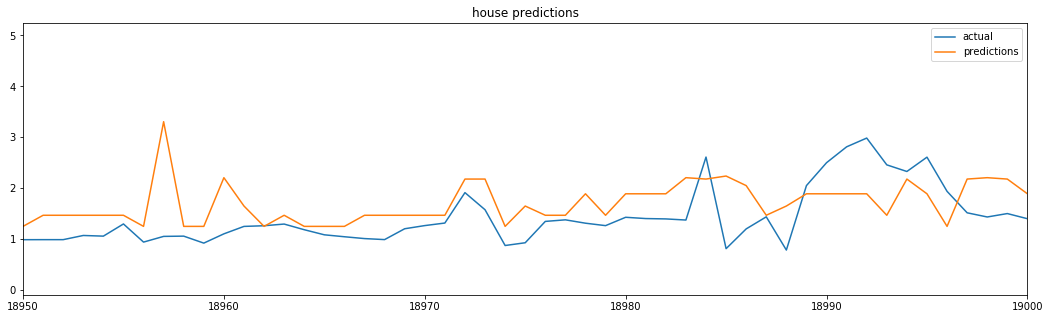

In [122]:
create_plot(test_df,tree,'house predictions')
plt.xlim(18950, 19000)

(4000, 6000)

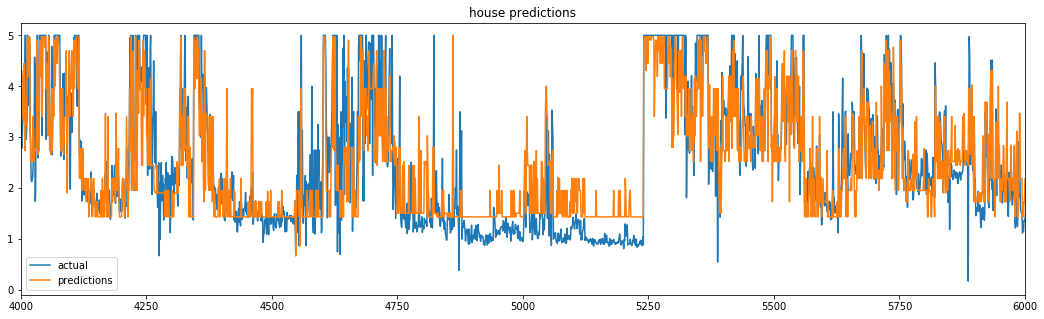

In [126]:
create_plot(train_df,tree,'house predictions')
plt.xlim(4000, 6000)

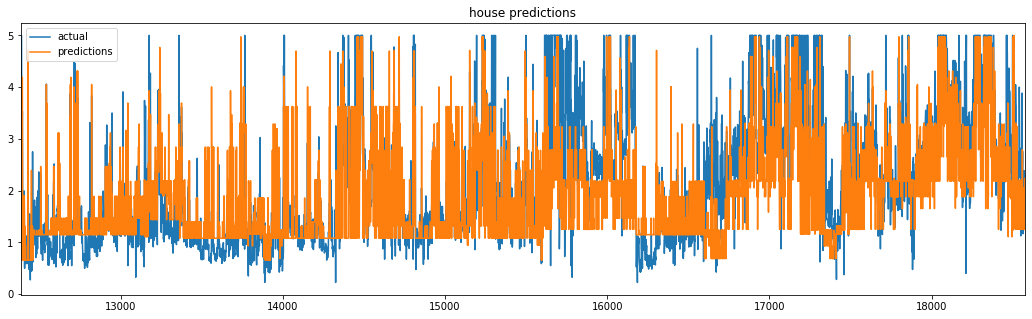

In [127]:
create_plot(val_df,tree,'house predictions')

In [131]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
target = iris.target
data = pd.DataFrame(iris.data,columns=iris.feature_names)


data.columns = ['sepal_length','sepal_width','petal_length','petal_width']

//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [132]:
import random
random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=123)

In [133]:
X_train['label'] = y_train
train_df = X_train

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
X_test['label'] = y_test
test_df = X_test

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
tree = DecisionTreeAlgo(train_df, ml_task='classification',max_depth=3)

In [136]:
tree

{'petal_width <= 0.6': [0.0,
  {'petal_width <= 1.7': [{'petal_length <= 5.1': [1.0, 2.0]},
    {'petal_length <= 4.8': [1.0, 2.0]}]}]}